In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import *   
import warnings
warnings.filterwarnings( "ignore" )

In [2]:
df = pd.read_csv('data.csv') # Reads the data csv
x=df.shape
print("total no of rows and colomuns:",x)
df.head(8) # prints 8 rows from uploaded csv file


total no of rows and colomuns: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN


In [3]:
df.isna().sum() # finds the sum of colomuns with missing val
df=df.dropna(axis=1) # drops the last col with empty val
df.shape

(569, 32)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

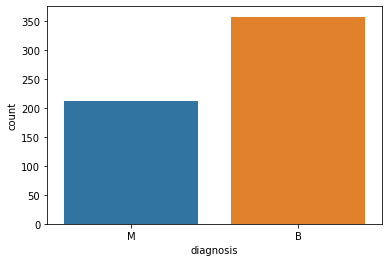

In [4]:
df['diagnosis'].value_counts()
sb.countplot(df['diagnosis'],label='count')

In [5]:
labelencoder_Y= LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

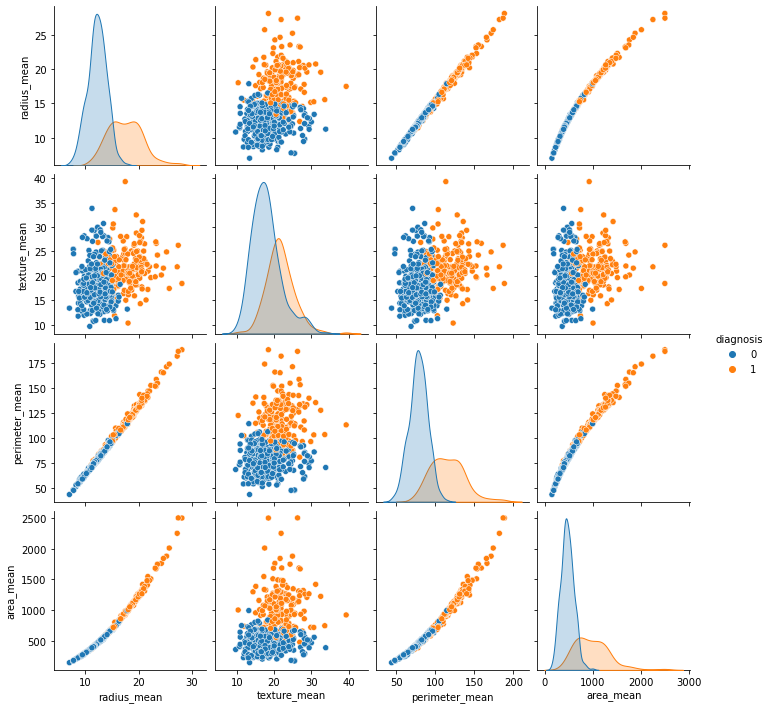

In [6]:
diag=sb.pairplot(df.iloc[:,1:6],hue='diagnosis')
diag.savefig("diag.png")

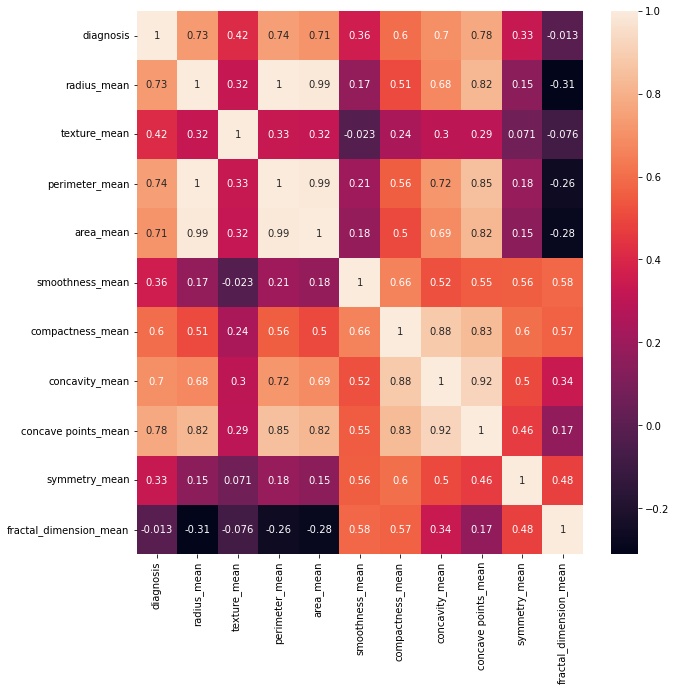

In [7]:
plt.figure(figsize=(10,10))
x=df.iloc[:,1:12].corr()
xx=sb.heatmap(x,annot=True)
figure = xx.get_figure()    
figure.savefig('features.png', dpi=400)


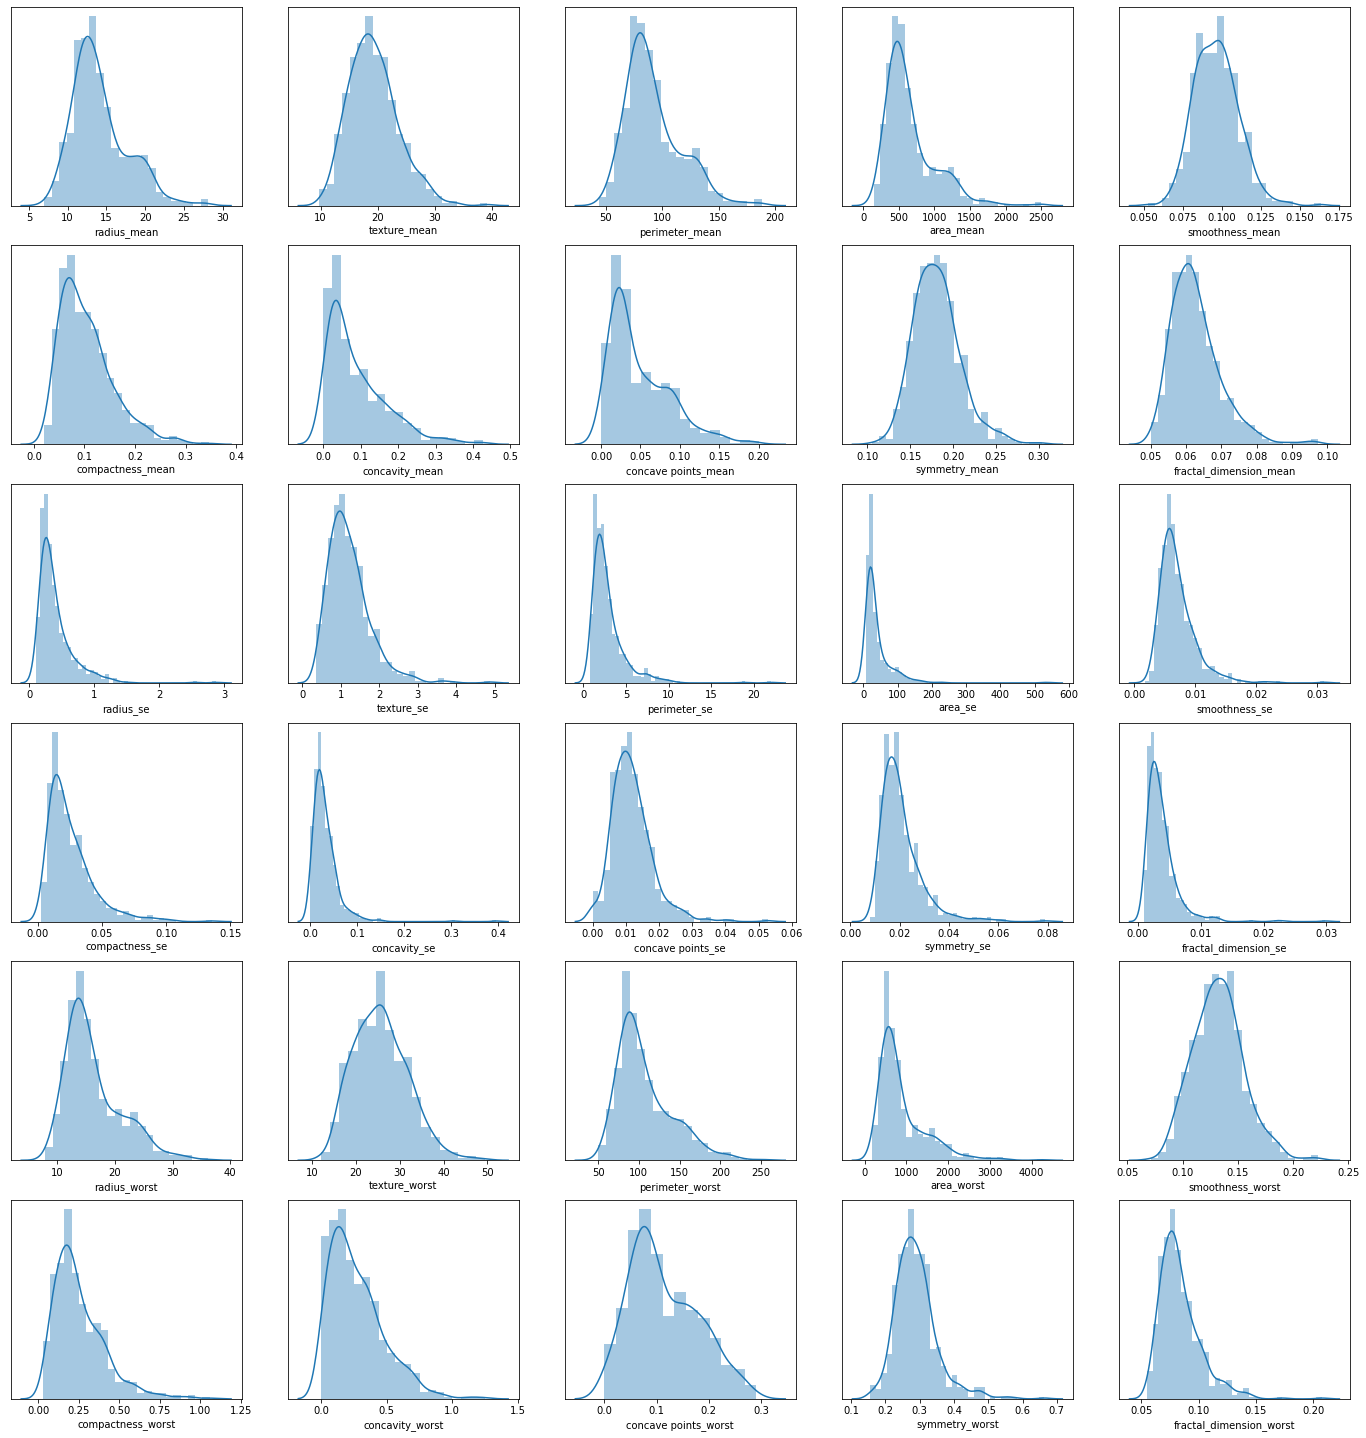

In [8]:
plt.figure(figsize=[24,30])
for i,feature in enumerate(df.iloc[:,2:]):
    plt.subplot(7,5,i+1)
    sb.distplot(df[feature])
    plt.yticks([])
    plt.ylabel('')
    plt.savefig("Out.png")
plt.show()

In [15]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

        
        
        
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

def trainData_testData_split(X, y, testPercentage, seed=1121):
    np.random.seed(seed)
    randomArray = np.random.rand(X.shape[0])
    splittedData = randomArray < np.percentile(randomArray, int((1 - testPercentage)*100))

    X_train = X[splittedData]
    y_train = y[splittedData]
    X_test  = X[~splittedData]
    y_test  = y[~splittedData]
    
    return X_train, X_test, y_train, y_test
#splitting the data the into independent x a nd y data sets
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values
X_train, X_test, Y_train, Y_test = trainData_testData_split(X, Y,0.25,0)
# Testing
if __name__ == "__main__":
    """
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
   """
    
    regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
    regressor.fit(X_train, Y_train)
    predictions = regressor.predict(X_test)

    # print("LR classification accuracy:", accuracy(Y_test, predictions))
def get_confusion_matrix(l1, l2):

    assert len(l1)==len(l2), "Two lists have different size."

    K = len(np.unique(l1))

    # create label-index value
    label_index = dict(zip(np.unique(l1), np.arange(K)))

    result = np.zeros((K, K))
    for i in range(len(l1)):
        result [label_index[l1[i]]][label_index[l2[i]]] += 1
    

    return result.astype(int)
x=get_confusion_matrix(Y_test,regressor.predict(X_test))
print(x)
TP=x[0][0]
TP=int(TP)
FP=x[0][1]
FP=int(FP)
FN=x[1][0]
FN=int(FN)
TN=x[1][1]
TN=int(TN)
print(TP)
print(FP)
print(FN)
print(TN)
xax=TP+TN+FN+FP
Accuracy=(TP+TN)/(TP+TN+FN+FP)
recall= TP/(TP+FN)  # True positivetity rate
precision=TP/(TP+FP) #
f_1= 2*(recall*precision)/(precision+recall)
True_positivetity_rate= TP/(FN+TP)
True_Negitive_Rate=TN/(TN+FP)
False_Positive_rate= FP/(TN+FP)
mis_rate=(FP+FN)/xax # Error Rate
Prevalence=TP+FN/xax
print(f'Accuracy of the LR is :{Accuracy}')
print(f'recall of the LR is : {recall}')
print(f'precision of the LR is :{precision}')
print(f'F_1 Score of the LR is :{f_1}')
print("AUC")
print(f'False_Positive_rate of the LR is : {False_Positive_rate}')
print(f'True_Negitive_Rate  of the LR is: {True_Negitive_Rate}')
print(f'True positivetity rate of the LR is : {True_positivetity_rate}')
print(f'Misclassification Rate of the LR is : {mis_rate}')
print(f'Prevalence of the NB is : {Prevalence}')

LR classification accuracy: 0.8951048951048951
[[83  8]
 [ 7 45]]
83
8
7
45
Accuracy of the LR is :0.8951048951048951
recall of the LR is : 0.9222222222222223
precision of the LR is :0.9120879120879121
F_1 Score of the LR is :0.9171270718232044
AUC
False_Positive_rate of the LR is : 0.1509433962264151
True_Negitive_Rate  of the LR is: 0.8490566037735849
True positivetity rate of the LR is : 0.9222222222222223
Misclassification Rate of the LR is : 0.1048951048951049
Prevalence of the NB is : 83.04895104895105


In [ ]:
y=sb.heatmap(x ,annot=True)
figure = y.get_figure()
plt.show()
figure.savefig(f'confusionmatrix of LR.png')